In [1]:
%load_ext kedro.extras.extensions.ipython

                    WARNING  /home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/kedro/e ]8;id=312432;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=349870;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/warnings.py#109\109]8;;\
                             xtras/extensions/ipython.py:18: DeprecationWarning:                                   
                             kedro.extras.extensions.ipython should be accessed only using the                     
                             alias kedro.ipython. The unaliased name will be removed in Kedro                      
                             0.19.0.                                                                               
                               warnings.warn(                                                                      
                                                                                                                   

                    INFO     Resolved project path as: /home/sossa/raftel.                          ]8;id=732228;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=737056;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/kedro/ipython/__init__.py#134\134]8;;\
                             To set a different path, run '%reload_kedro <project_root>'                           

[01/30/24 13:41:07] INFO     Kedro project raftel                                                   ]8;id=16394;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=562156;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/kedro/ipython/__init__.py#103\103]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=683349;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=279649;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/kedro/ipython/__init__.py#104\104]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=167562;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=160190;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/kedro/ipython/__init__.py#110\110]8;;\

In [2]:
%reload_kedro

                    INFO     Resolved project path as: /home/sossa/raftel.                          ]8;id=477642;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=2278;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/kedro/ipython/__init__.py#134\134]8;;\
                             To set a different path, run '%reload_kedro <project_root>'                           

[01/30/24 13:41:07] INFO     Kedro project raftel                                                   ]8;id=273340;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=1380;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/kedro/ipython/__init__.py#103\103]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=213218;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=310505;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/kedro/ipython/__init__.py#104\104]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=226648;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=886742;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/kedro/ipython/__init__.py#110\110]8;;\

In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, IntegerType, StringType
import pyspark.sql.functions as F
from pyspark.sql.window import Window

In [4]:
aras_a = catalog.load("aras_a@spark")

[01/30/24 13:41:32] INFO     Loading data from 'aras_a@spark' (SparkDataSet)...                 ]8;id=13060;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=7043;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/kedro/io/data_catalog.py#343\343]8;;\

In [5]:
labels = aras_a.select("LR1", "LR2").distinct().withColumn("LABEL", F.monotonically_increasing_id())

In [6]:
dataset1 = aras_a.drop("LABEL").join(
    labels,
    ["LR1", "LR2"],
    "LEFT"
).orderBy(
    "SEC"
).select(
    "DAY",
    "SEC",
    "LR1",
    "LR2",
    "LABEL"
)

In [7]:
dataset1.filter(F.col("LABEL") == 0).show()

+---+------+---+---+-----+
|DAY|   SEC|LR1|LR2|LABEL|
+---+------+---+---+-----+
|6.0|495410| 25| 12|    0|
|6.0|495411| 25| 12|    0|
|6.0|495412| 25| 12|    0|
|6.0|495413| 25| 12|    0|
|6.0|495414| 25| 12|    0|
|6.0|495415| 25| 12|    0|
|6.0|495416| 25| 12|    0|
|8.0|612975| 25| 12|    0|
|8.0|612976| 25| 12|    0|
|8.0|612977| 25| 12|    0|
|8.0|613282| 25| 12|    0|
|8.0|613283| 25| 12|    0|
|8.0|613284| 25| 12|    0|
|8.0|613285| 25| 12|    0|
|8.0|613286| 25| 12|    0|
|8.0|613287| 25| 12|    0|
|8.0|613288| 25| 12|    0|
|8.0|613289| 25| 12|    0|
|8.0|613290| 25| 12|    0|
|8.0|613291| 25| 12|    0|
+---+------+---+---+-----+
only showing top 20 rows



In [8]:
dataset1.printSchema()

root
 |-- DAY: double (nullable = true)
 |-- SEC: long (nullable = true)
 |-- LR1: long (nullable = true)
 |-- LR2: long (nullable = true)
 |-- LABEL: long (nullable = true)



[01/30/24 13:41:55] WARNING  /home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/pyspark ]8;id=221182;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=828930;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/warnings.py#109\109]8;;\
                             /sql/pandas/conversion.py:117: UserWarning: toPandas attempted Arrow                  
                             optimization because 'spark.sql.execution.arrow.pyspark.enabled' is                   
                             set to true; however, failed by the reason below:                                     
                               PyArrow >= 1.0.0 must be installed; however, it was not found.                      
                             Attempting non-optimization as                                                        
                             'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.                  
                               warn(msg)                                                                           
                                                                                                                   

[01/30/24 13:42:21] WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=518035;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=211800;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

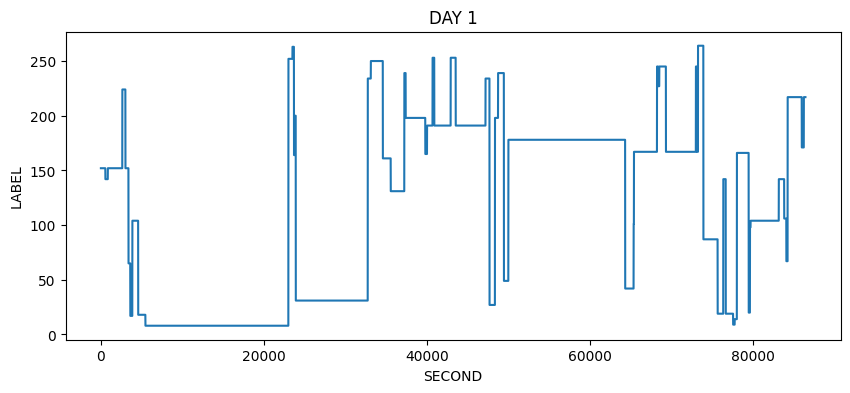

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=469983;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=399450;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

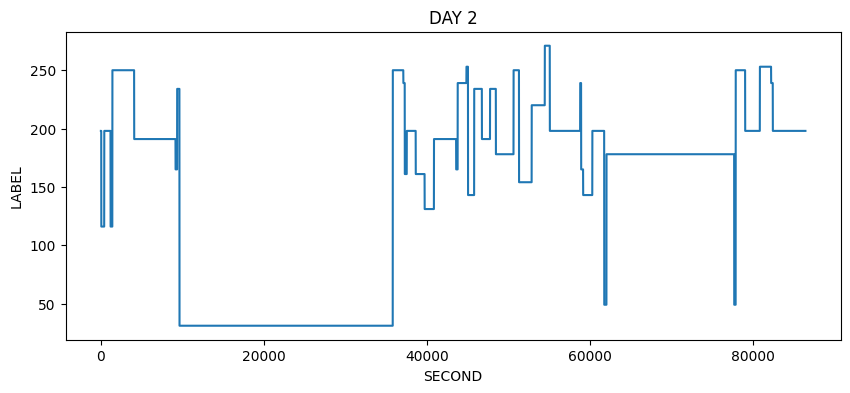

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=114386;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=45802;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

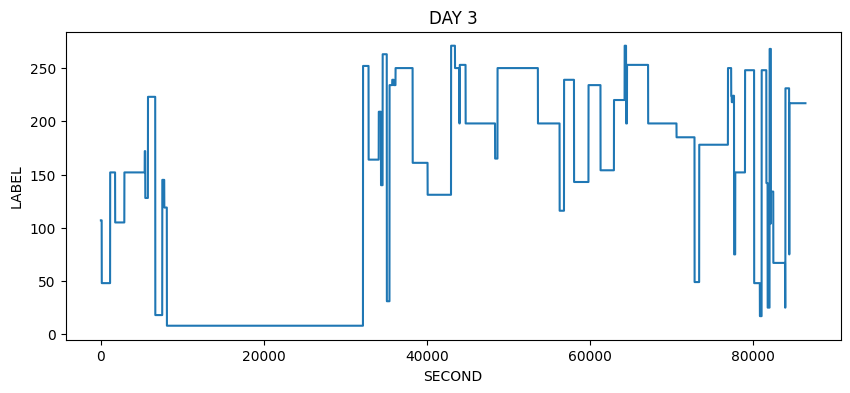

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=631375;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=143153;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

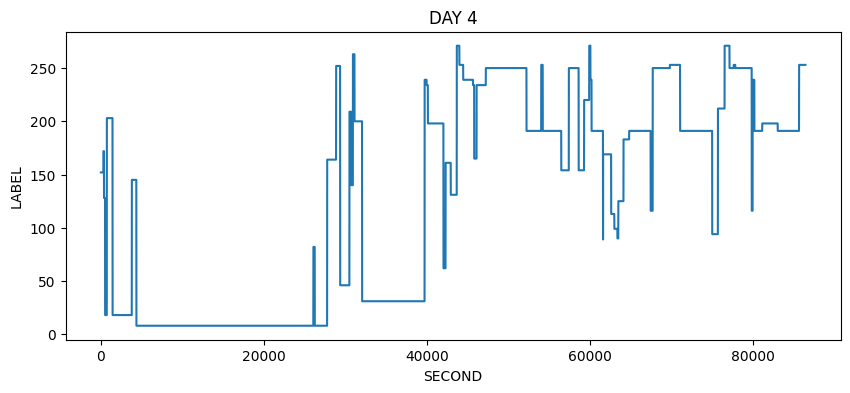

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=929430;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=315739;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

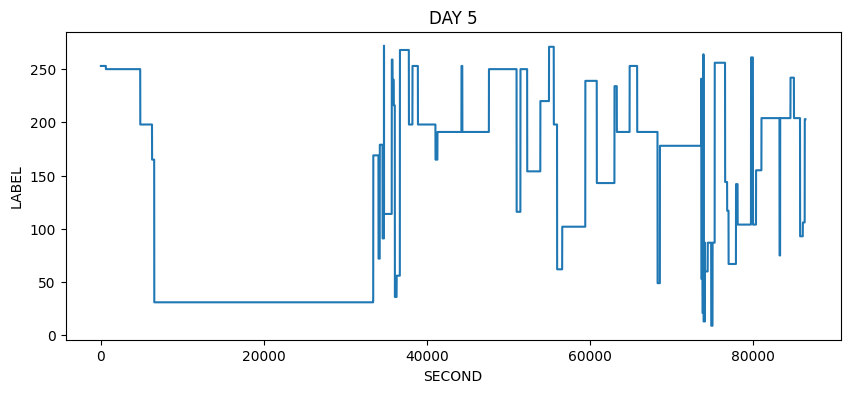

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=122152;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=366477;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

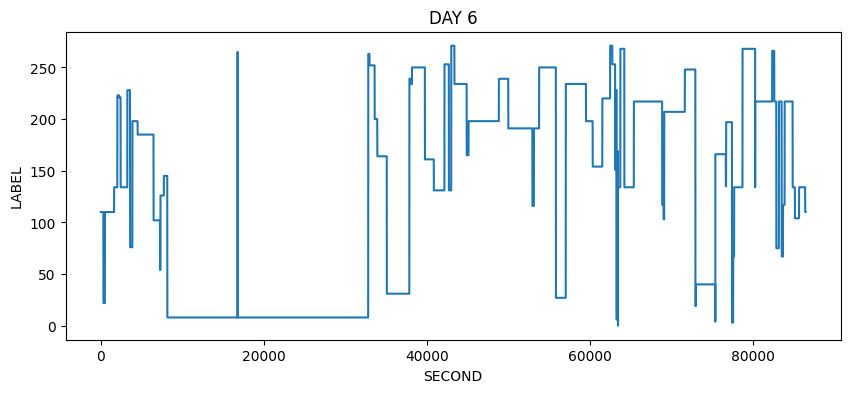

[01/30/24 13:42:22] WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=390098;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=742508;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

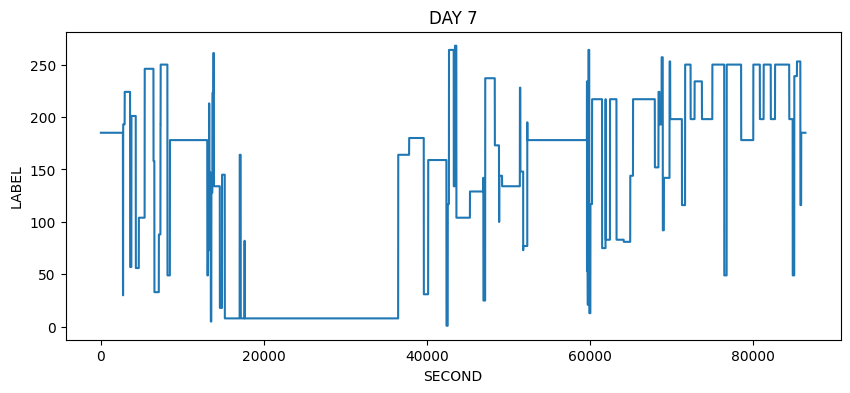

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=358417;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=626951;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

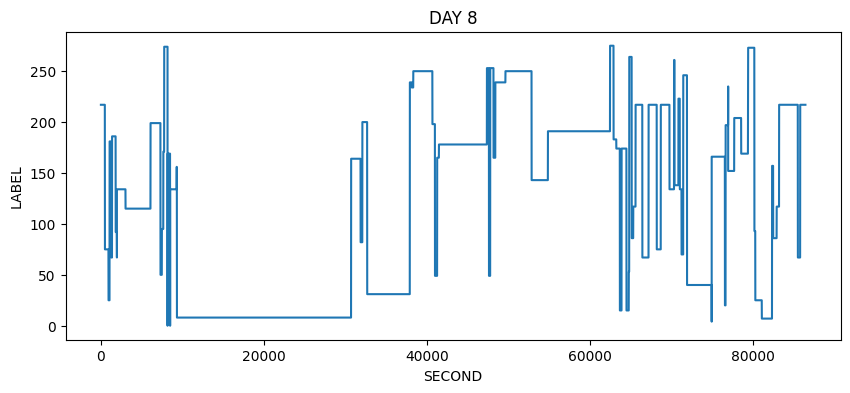

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=960243;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=12699;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

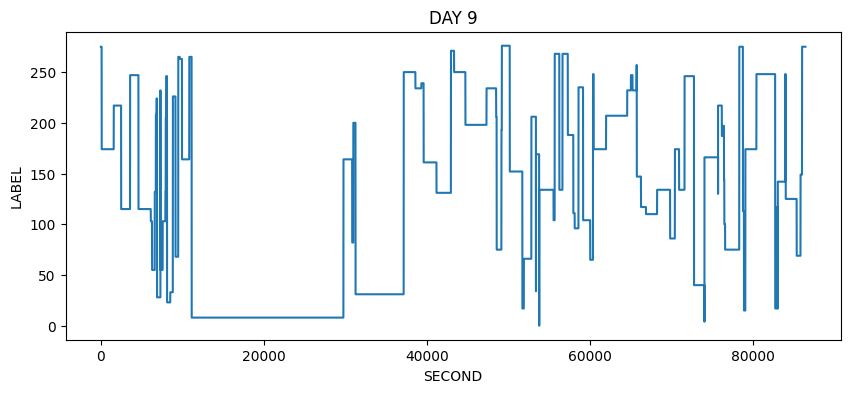

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=38033;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=605990;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

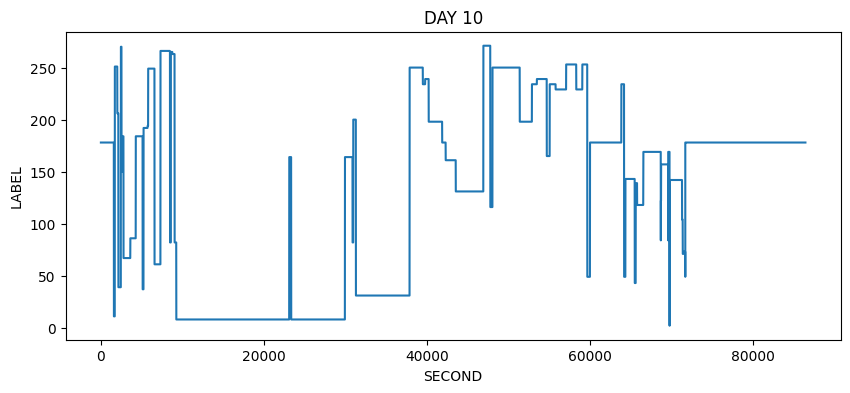

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=602123;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=520151;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

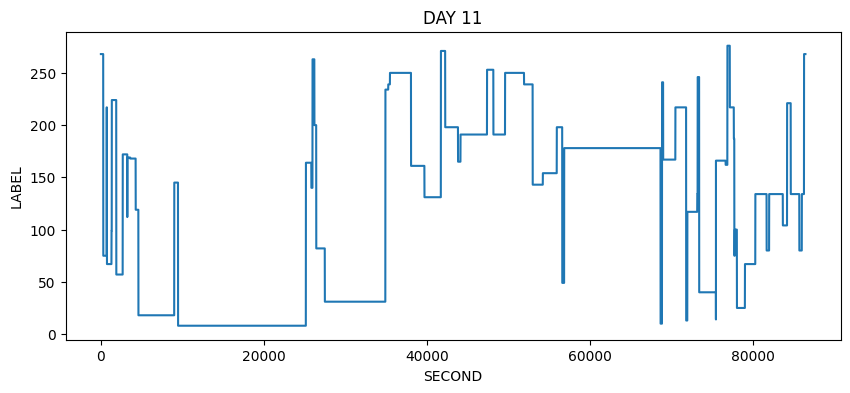

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=343954;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=941671;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

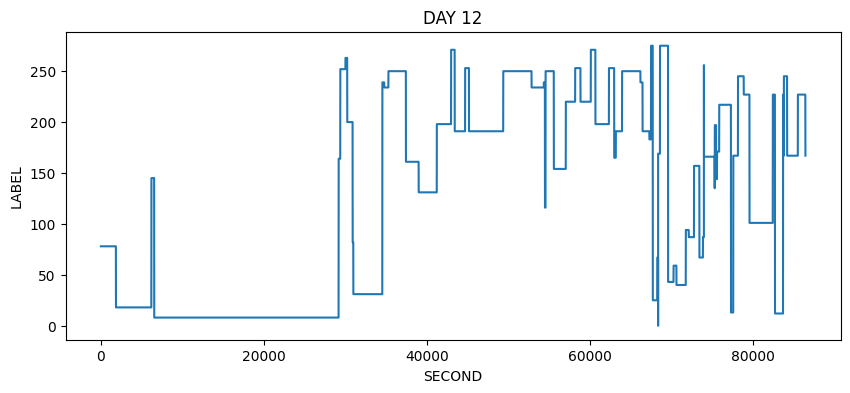

[01/30/24 13:42:23] WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=571465;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=491051;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

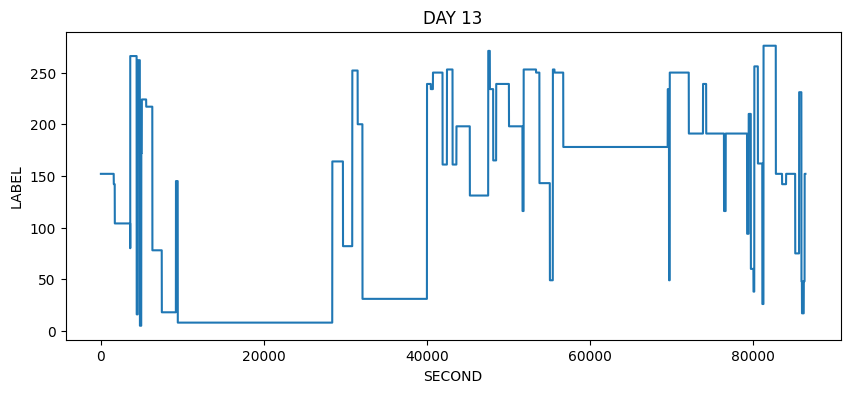

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=234647;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=277251;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

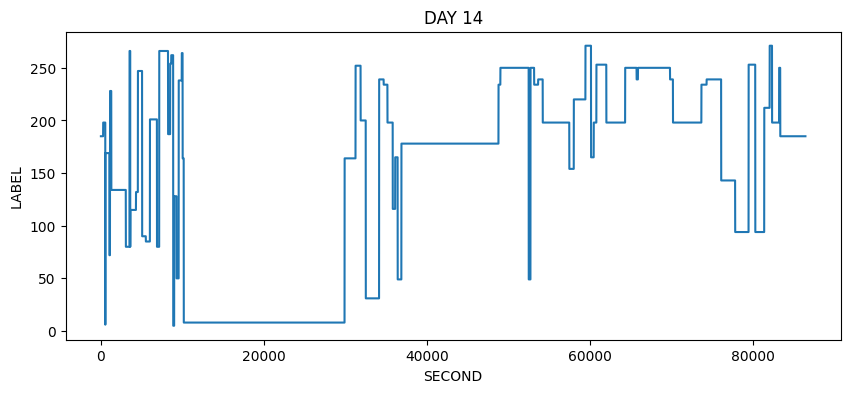

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=417278;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=211417;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

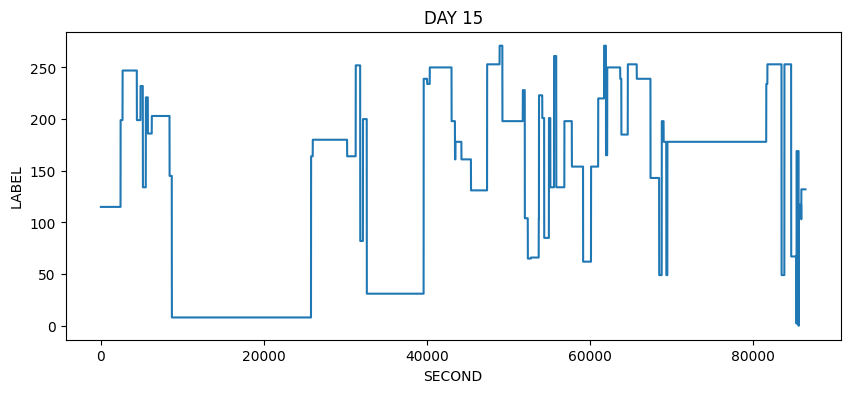

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=818414;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=39652;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

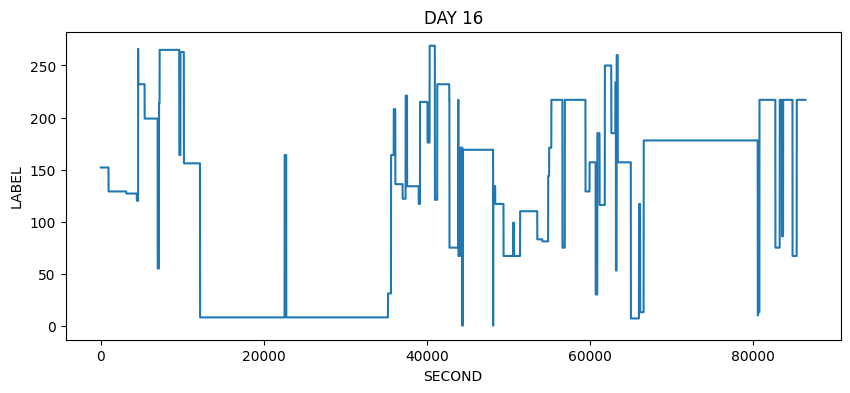

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=550209;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=134019;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

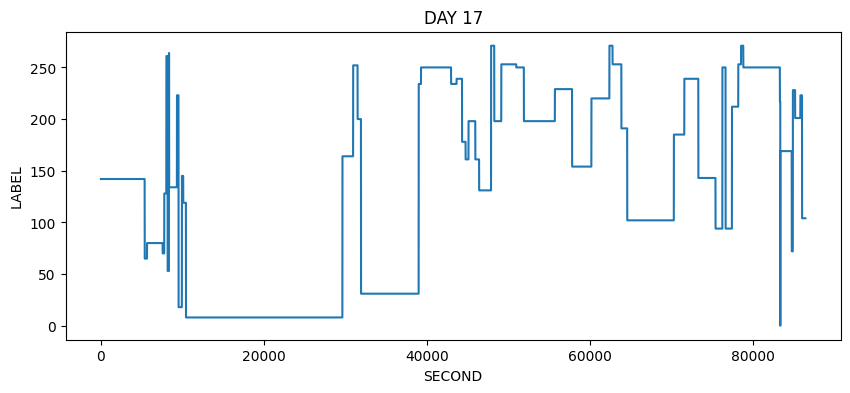

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=682857;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=924634;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

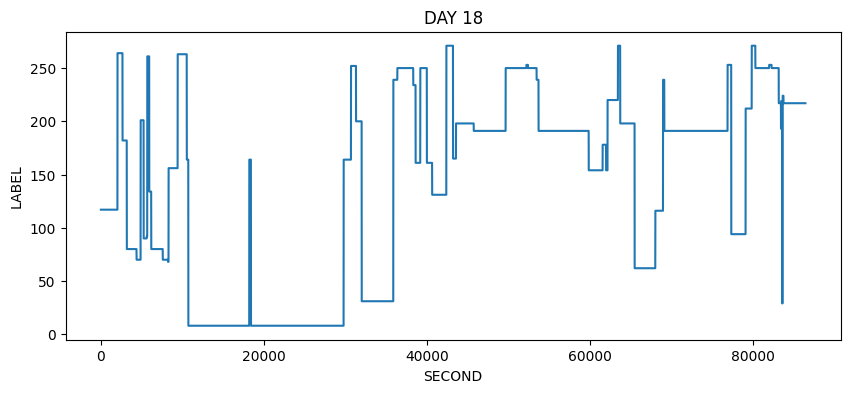

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=310827;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=203728;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

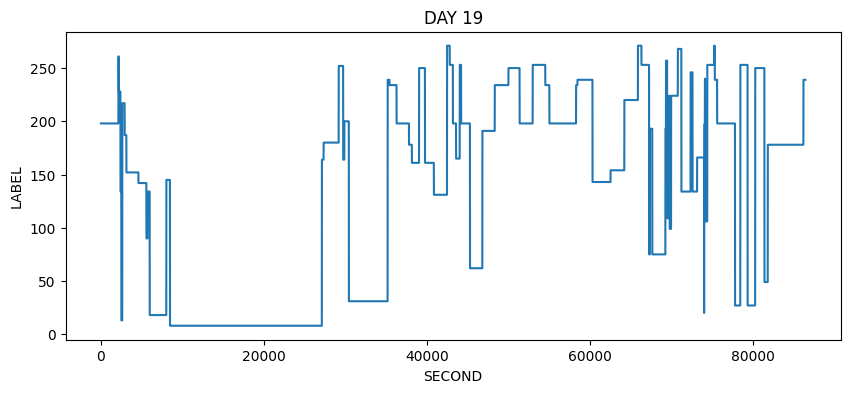

[01/30/24 13:42:24] WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=63105;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=510299;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

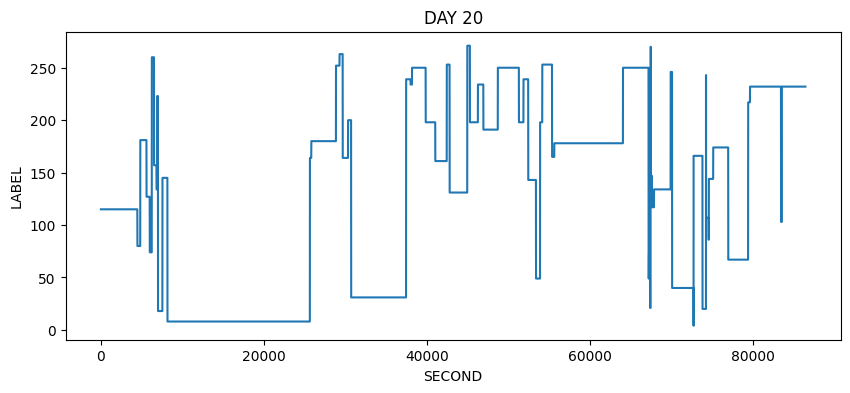

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=711423;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=469911;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

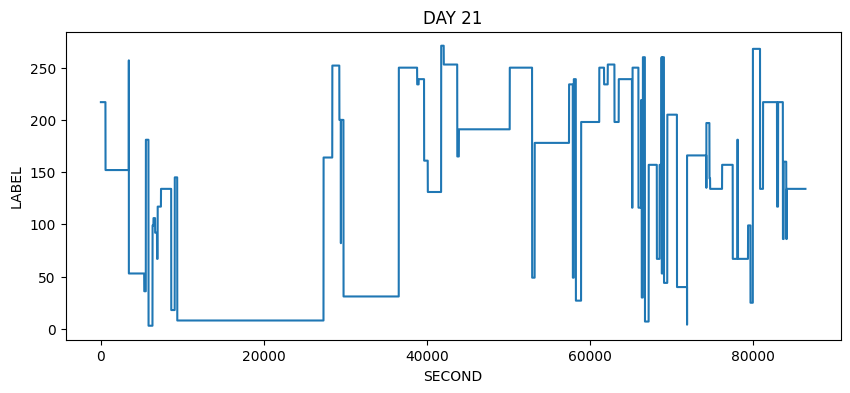

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=75034;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=867201;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

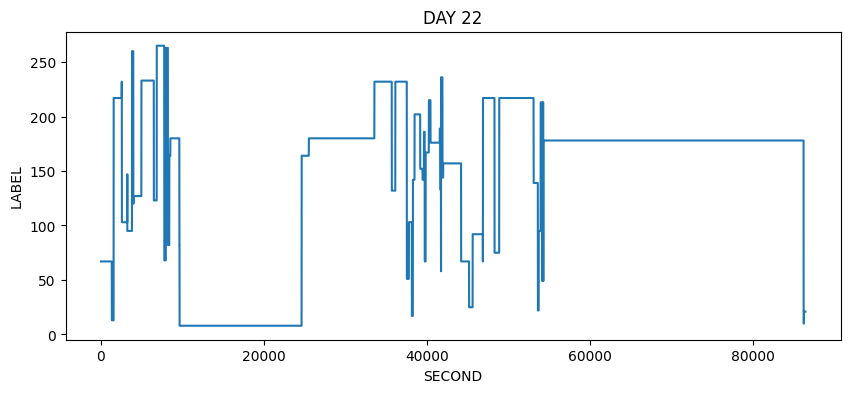

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=677032;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=389953;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

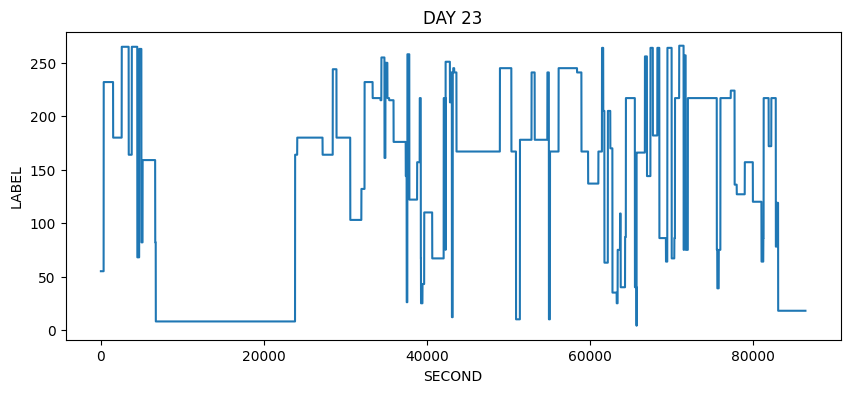

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=982774;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=305244;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

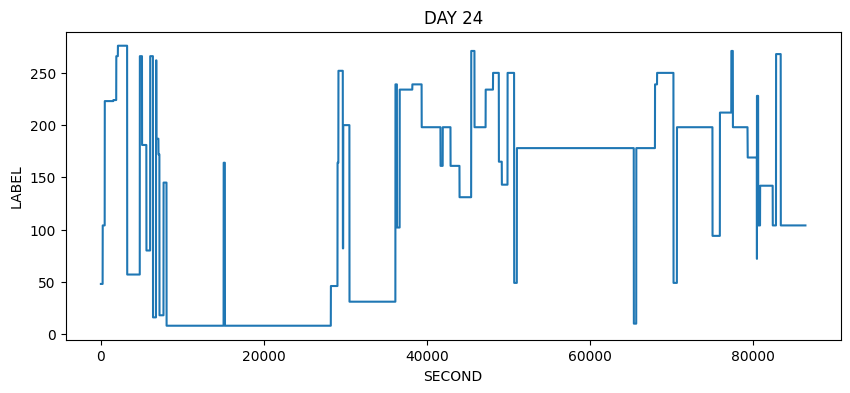

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=743705;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=610741;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

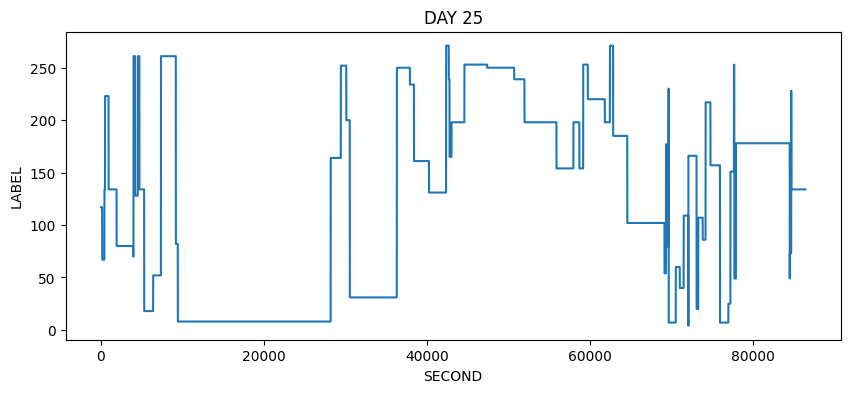

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=80665;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=954308;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

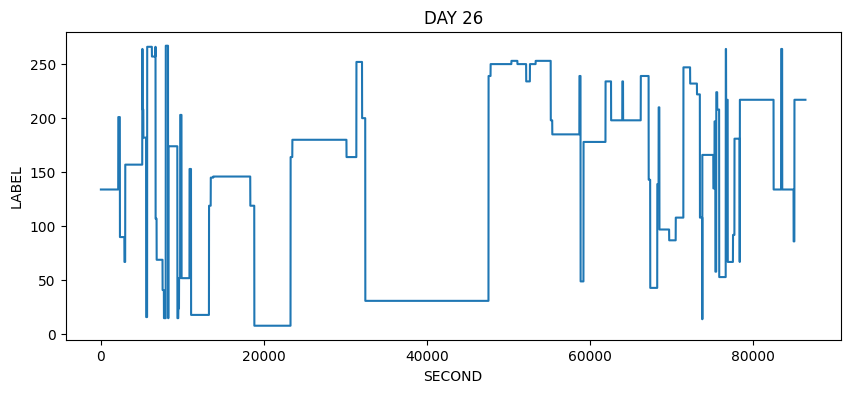

[01/30/24 13:42:25] WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=857217;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=221799;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

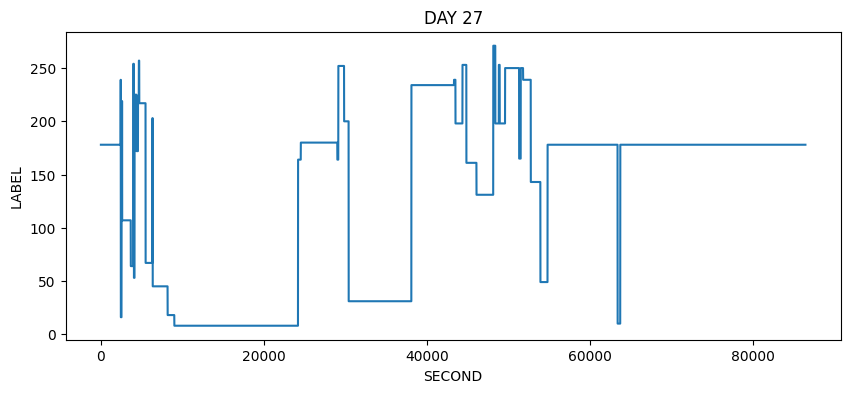

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=579016;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=794734;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

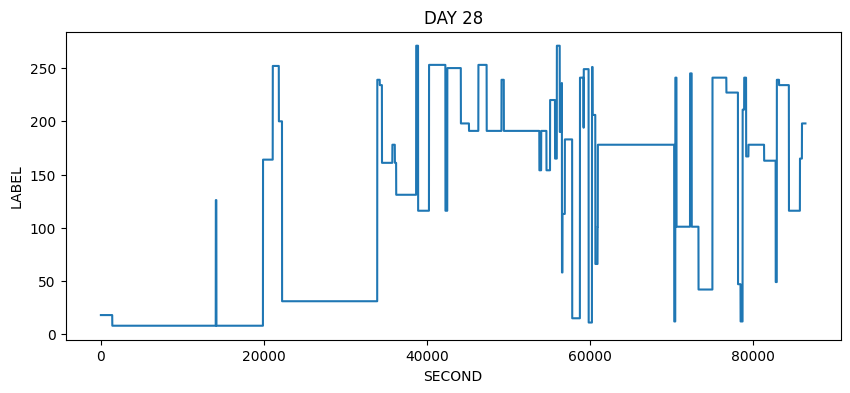

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=925232;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=746771;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

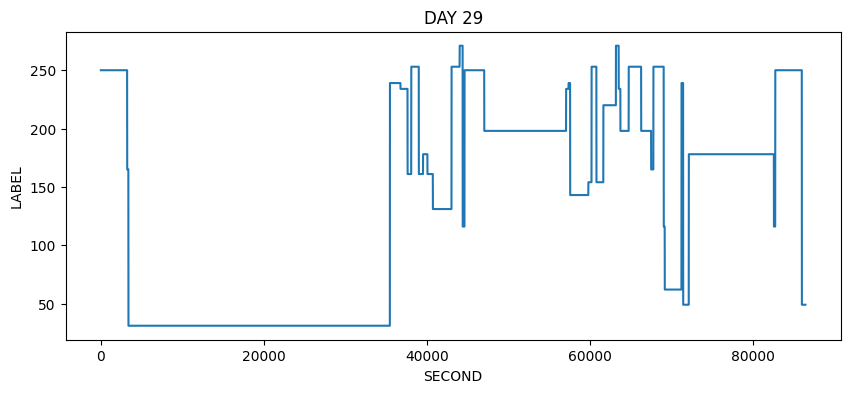

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=353208;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=800173;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

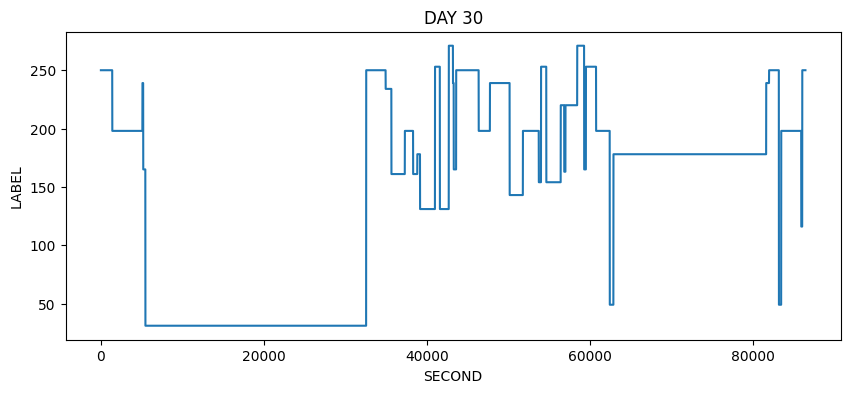

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = dataset1.toPandas()
#print(df)

x = df.loc[df['DAY'] == 1, 'SEC']

for i in range(1, 31):
    y = df.loc[df['DAY'] == i, 'LABEL']
    
    plt.figure(figsize=(10,4))
    plt.plot(x, y)
    plt.ylabel('LABEL')
    plt.xlabel('SECOND')
    plt.title(f"DAY {i}")
    plt.legend().remove()
    plt.show()

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=941915;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=917977;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

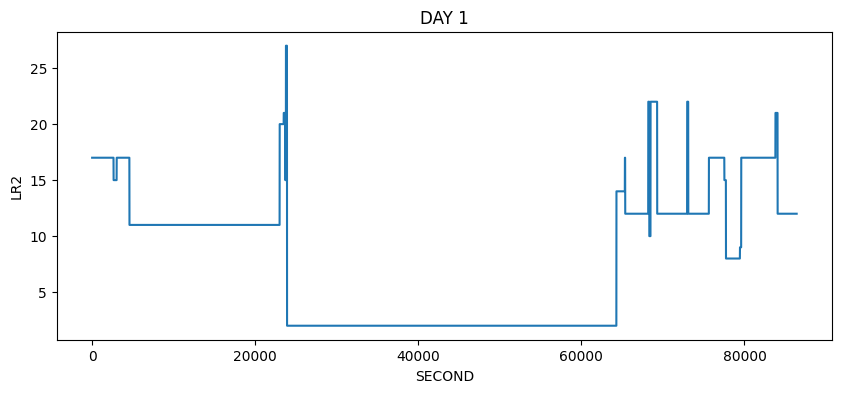

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=807068;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=178029;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

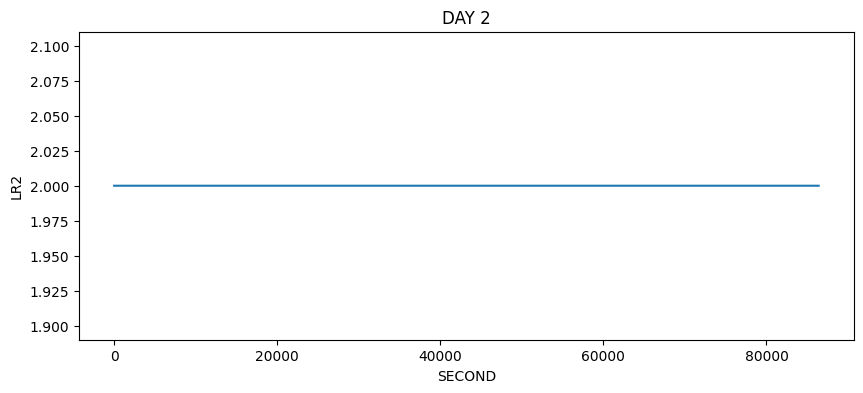

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=680593;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=718043;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

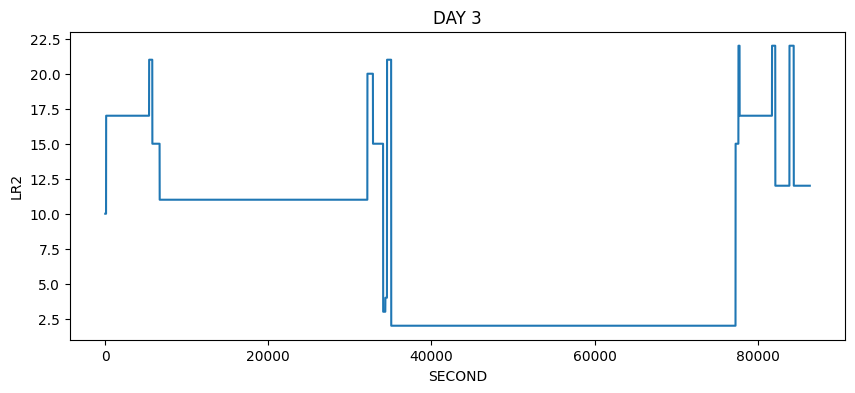

[01/30/24 13:42:26] WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=648779;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=795507;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

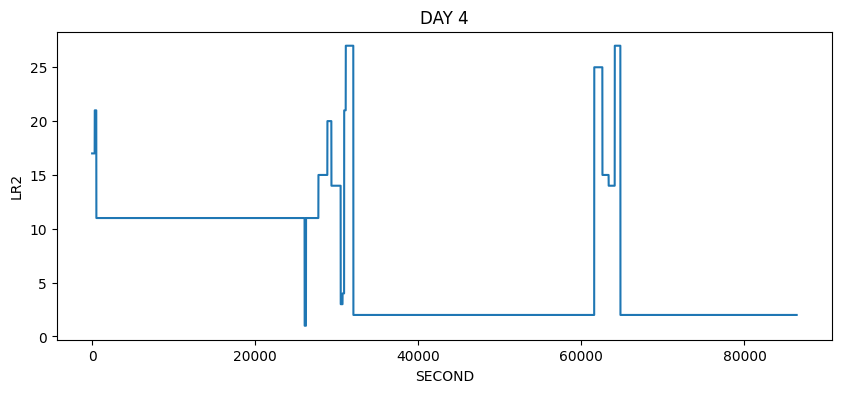

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=779594;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=560910;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

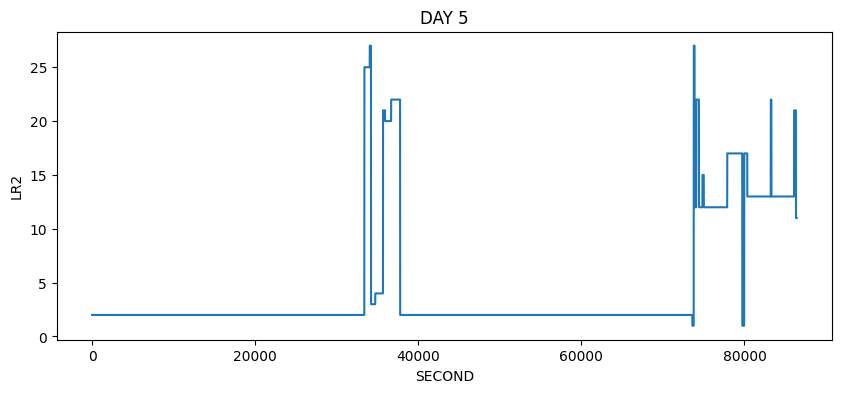

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=948534;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=481096;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

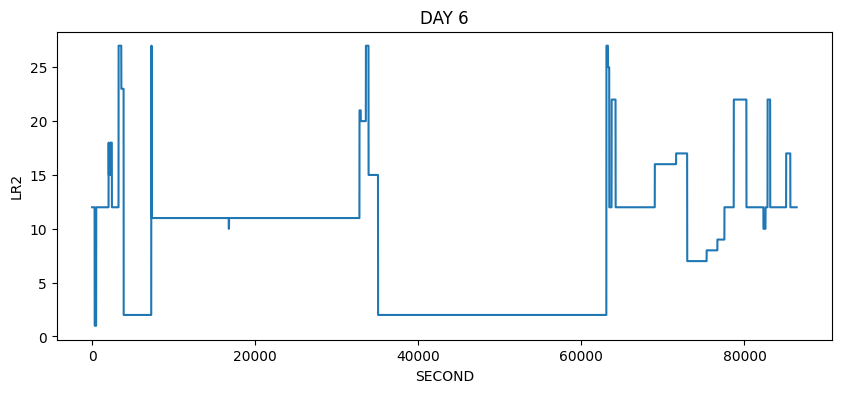

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=224192;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=664498;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

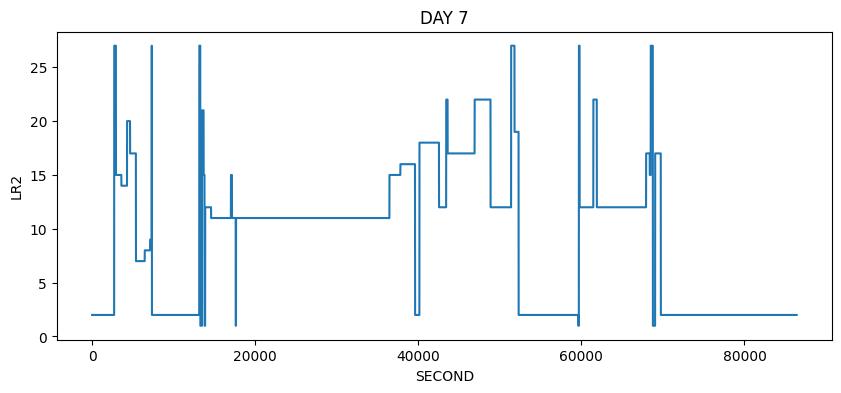

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=59047;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=35081;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

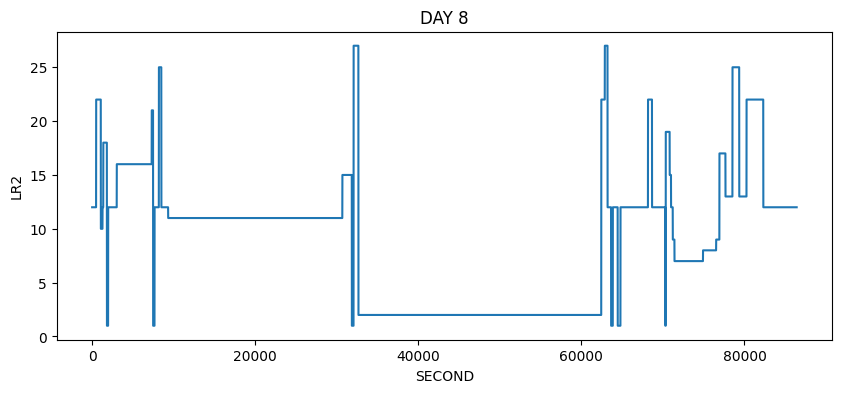

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=304191;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=551037;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

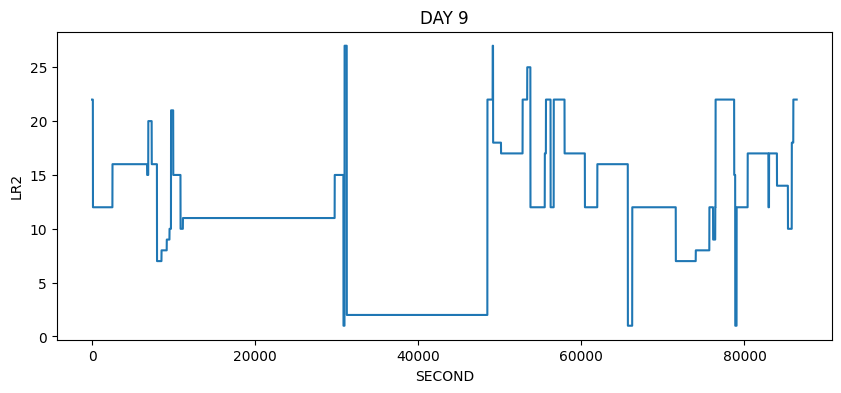

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=12348;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=964900;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

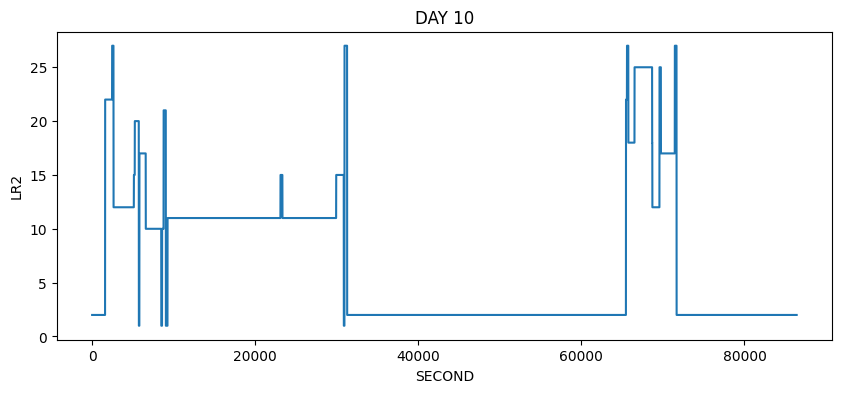

[01/30/24 13:42:27] WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=304326;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=777776;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

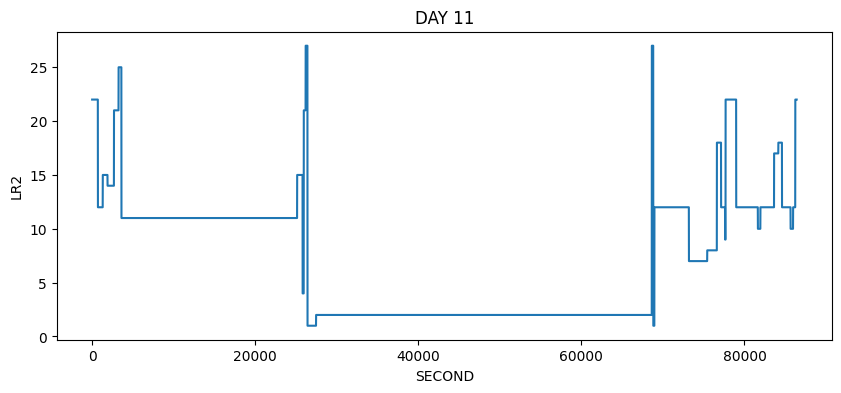

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=184640;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=981501;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

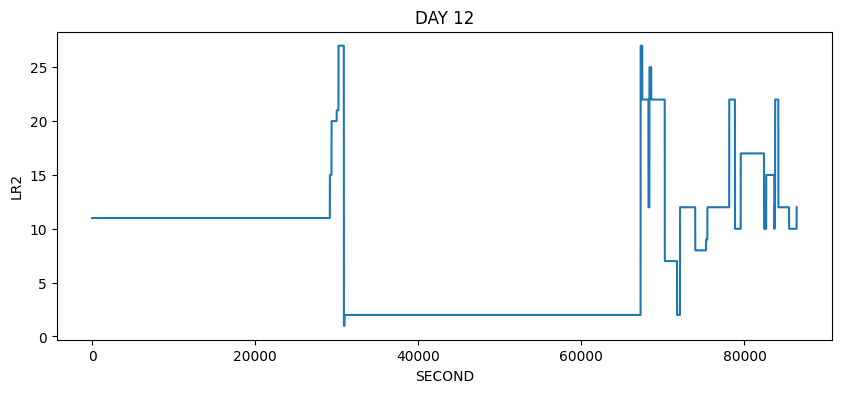

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=135316;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=104300;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

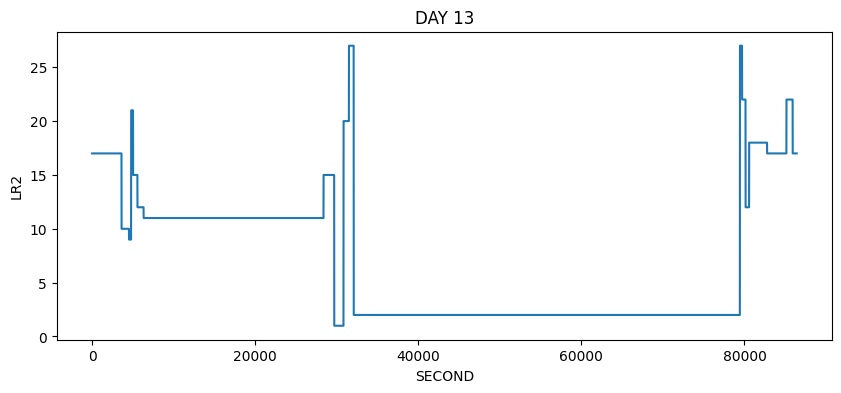

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=893266;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=46354;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

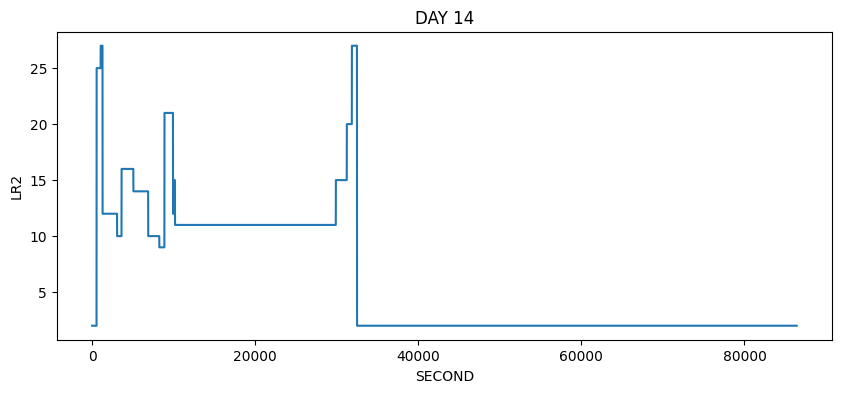

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=988423;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=735020;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

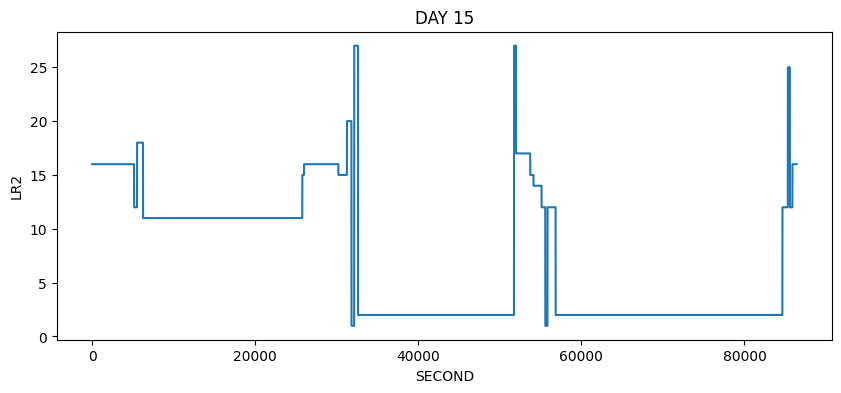

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=710997;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=456071;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

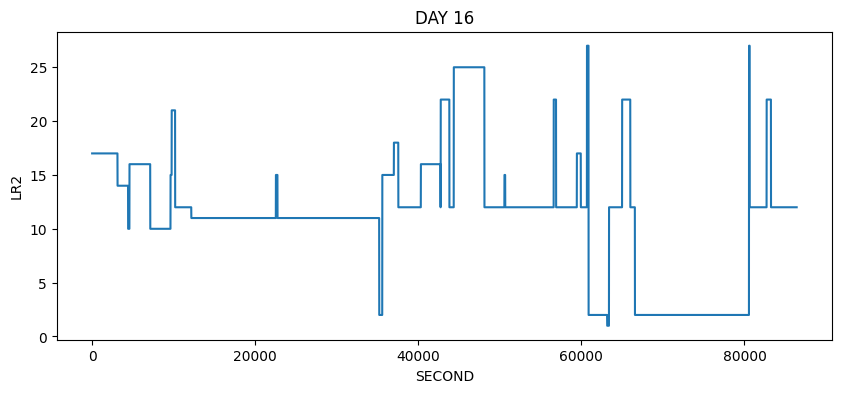

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=125758;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=379406;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

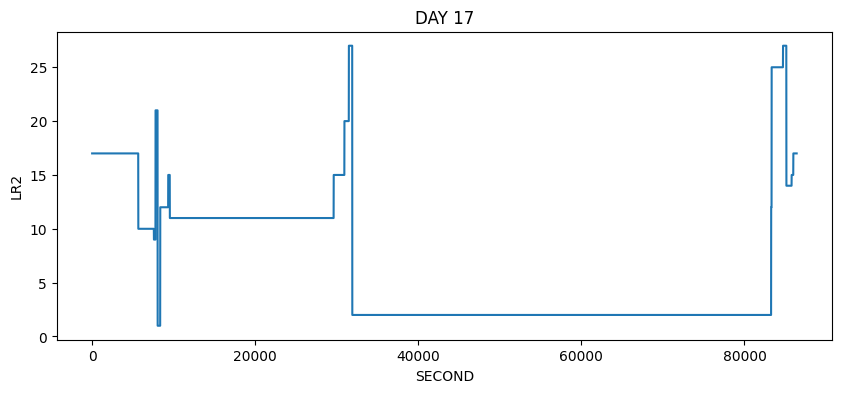

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=88045;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=227756;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

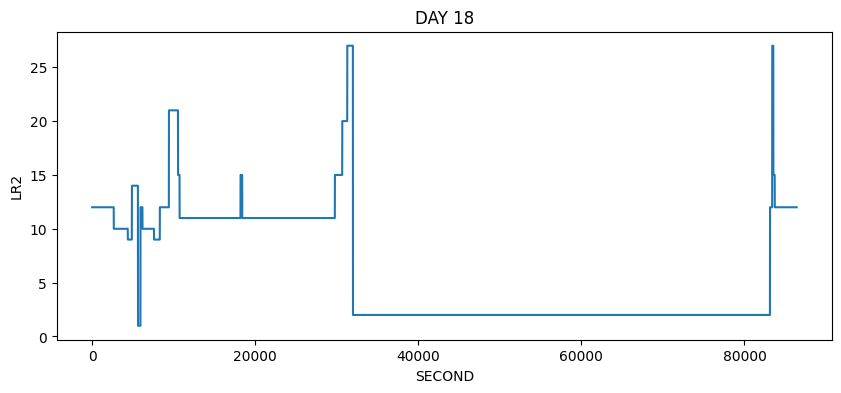

[01/30/24 13:42:28] WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=769816;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=102050;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

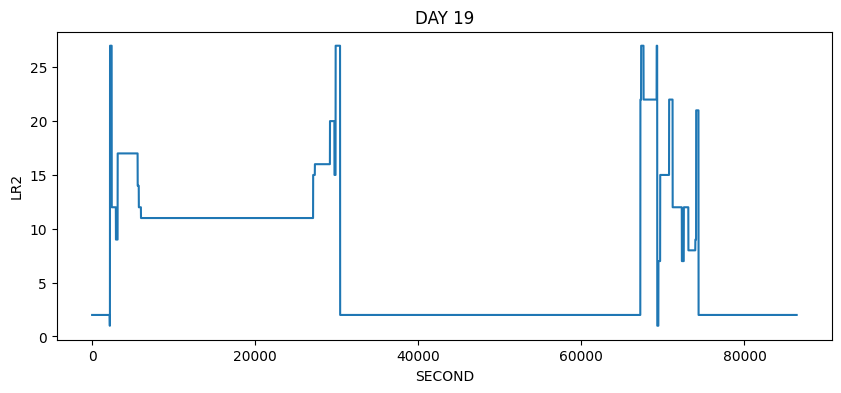

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=403651;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=33526;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

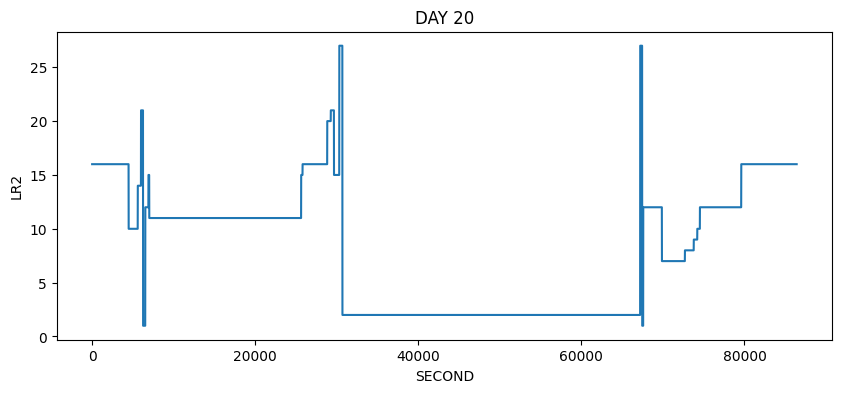

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=493943;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=353041;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

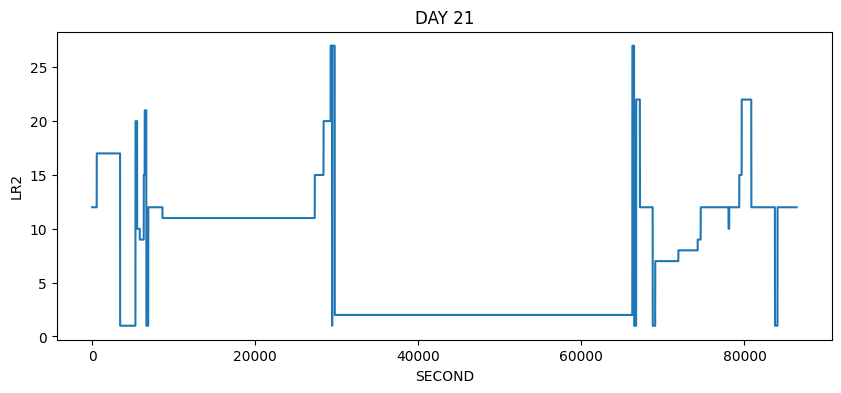

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=822799;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=57348;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

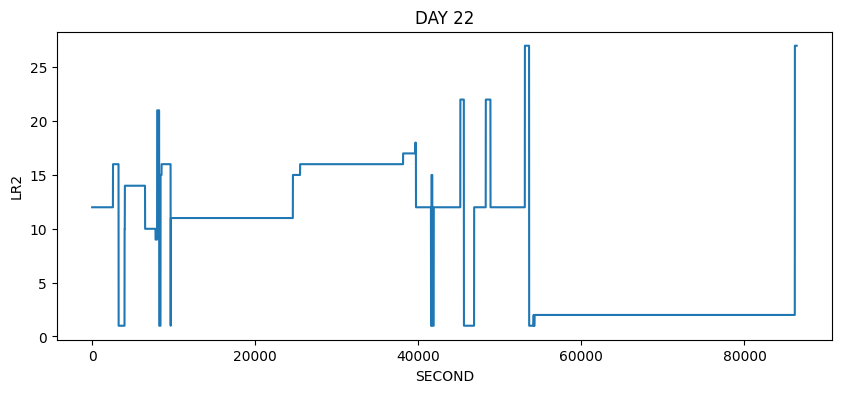

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=917836;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=623504;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

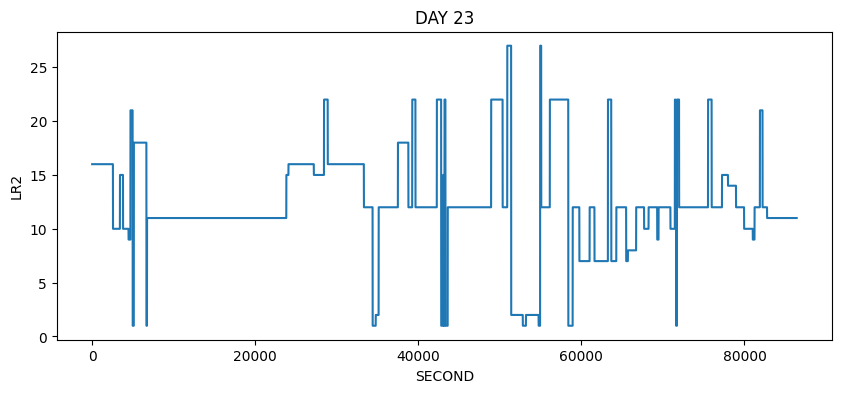

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=375302;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=63235;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

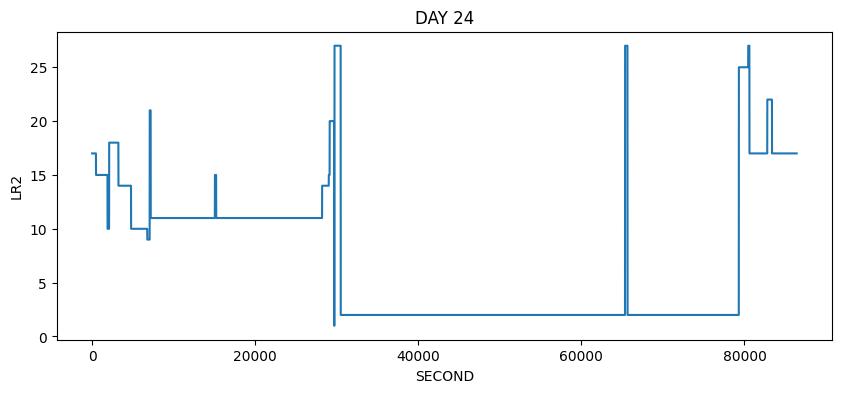

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=121315;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=885636;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

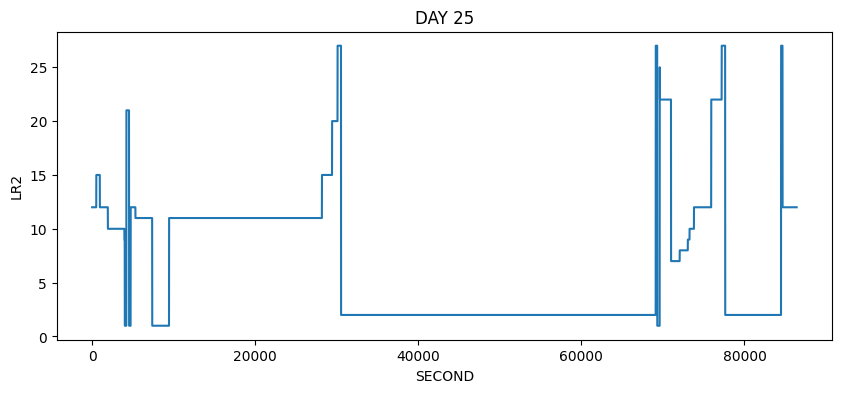

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=774113;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=796886;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

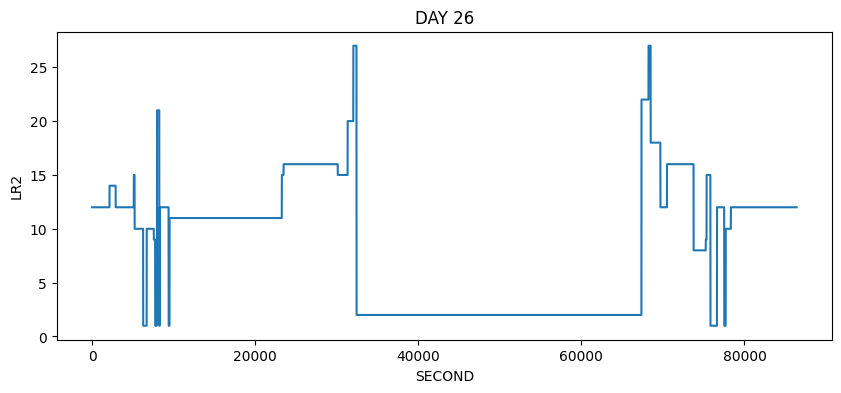

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=738677;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=1005;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

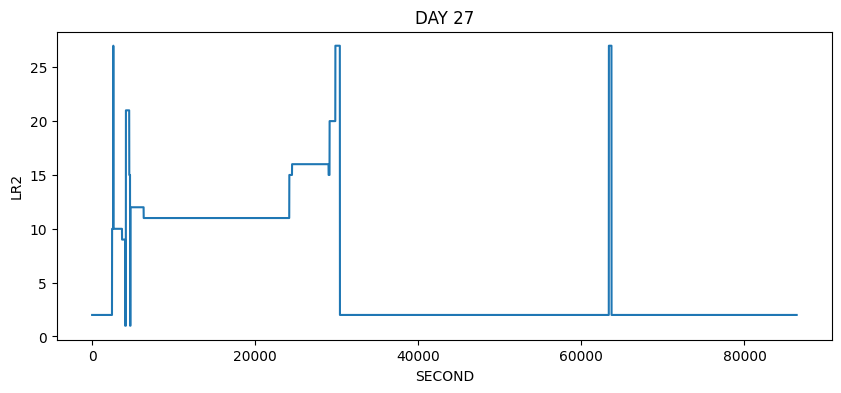

[01/30/24 13:42:29] WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=149775;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=180989;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

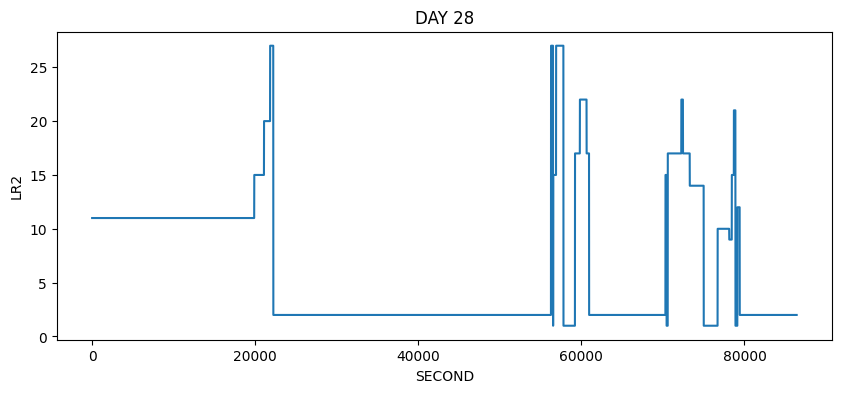

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=285212;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=224846;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

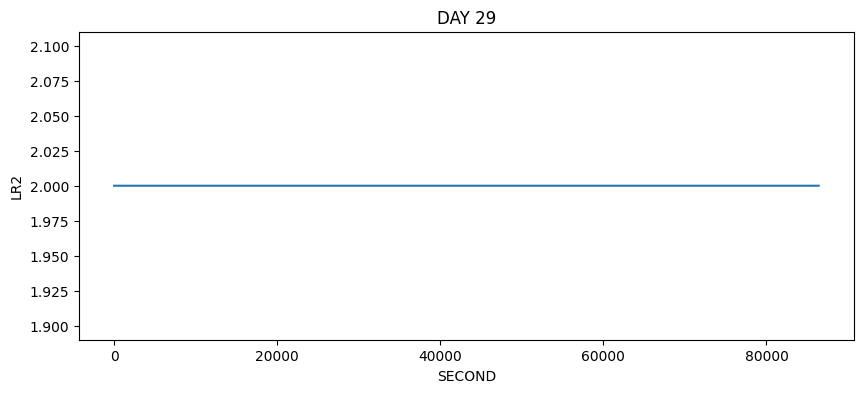

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=378035;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=175488;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

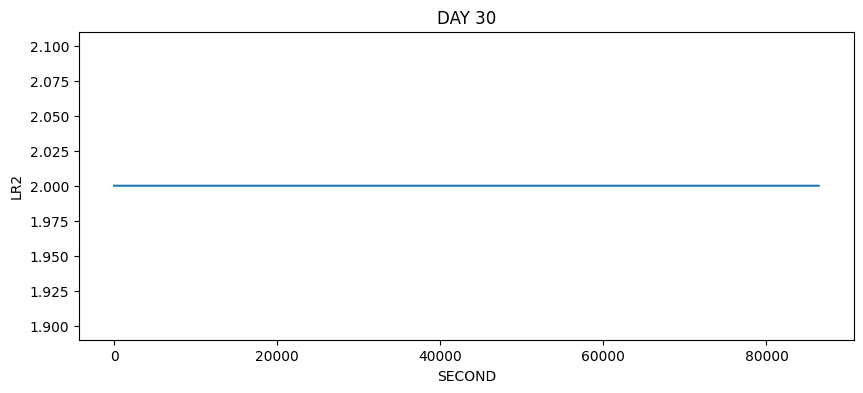

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

x = df.loc[df['DAY'] == 1, 'SEC']

for i in range(1, 31):
    y = df.loc[df['DAY'] == i, 'LR2']
    
    plt.figure(figsize=(10,4))
    plt.plot(x, y)
    plt.ylabel('LR2')
    plt.xlabel('SECOND')
    plt.title(f"DAY {i}")
    plt.legend().remove()
    plt.show()

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=921269;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=368717;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

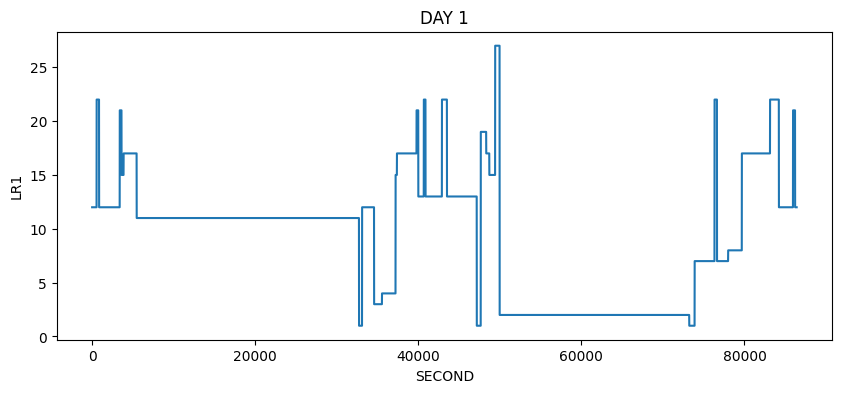

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=491834;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=22591;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

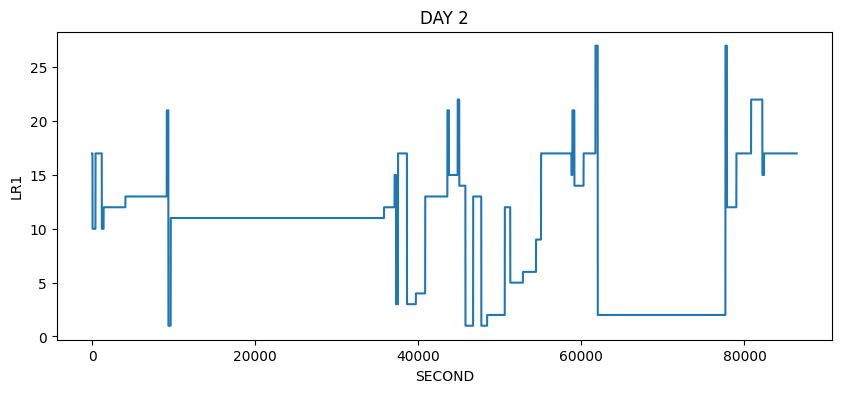

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=779981;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=957618;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

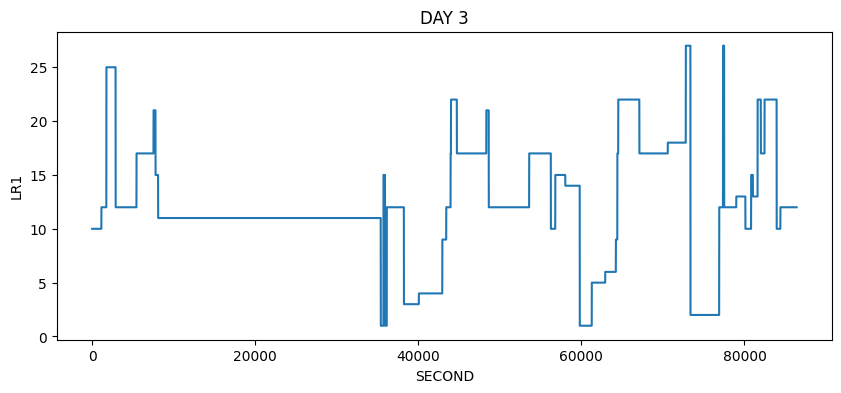

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=427942;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=387371;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

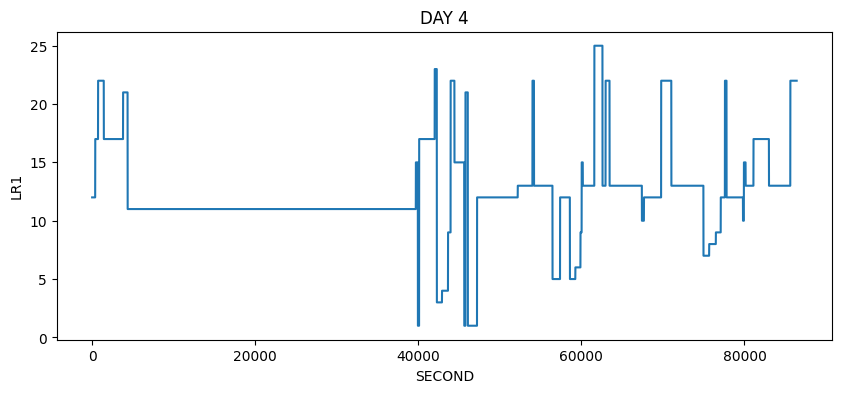

[01/30/24 13:42:30] WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=267262;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=661006;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

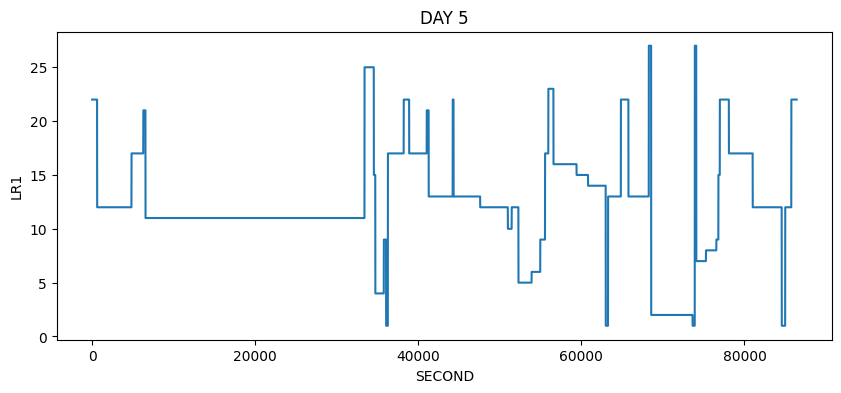

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=87211;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=466073;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

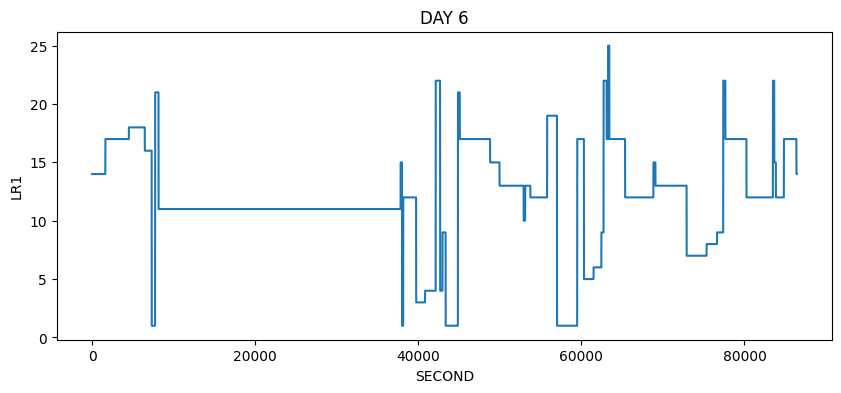

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=590335;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=484858;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

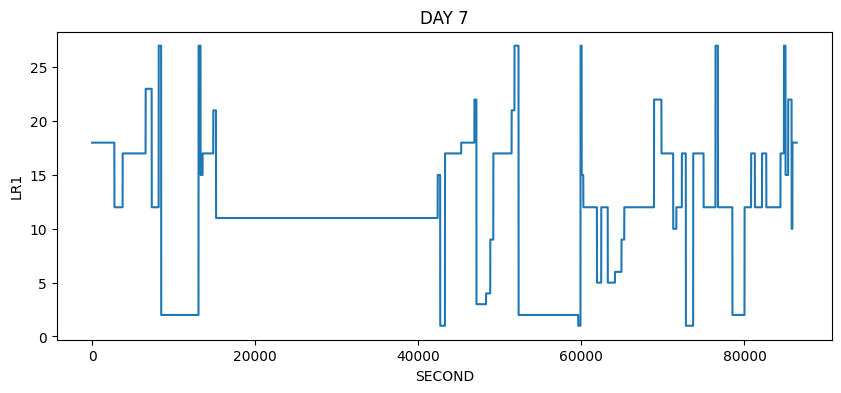

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=681666;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=961877;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

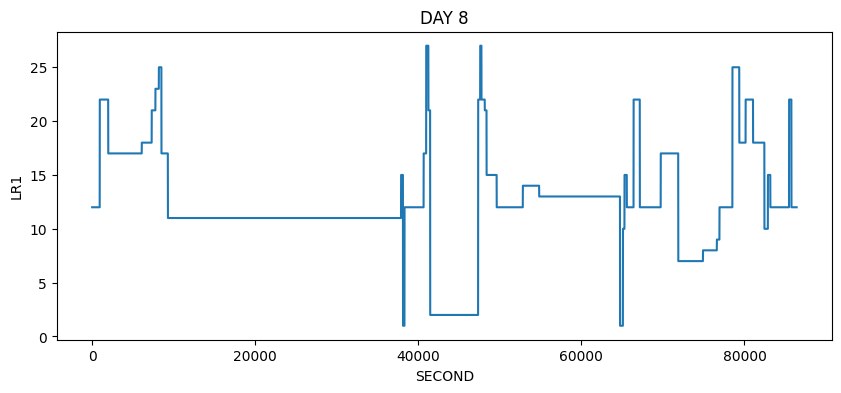

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=414732;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=792113;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

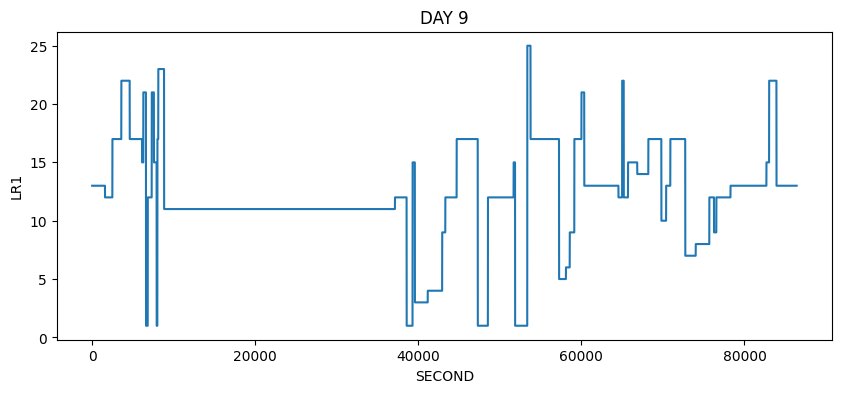

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=622875;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=92890;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

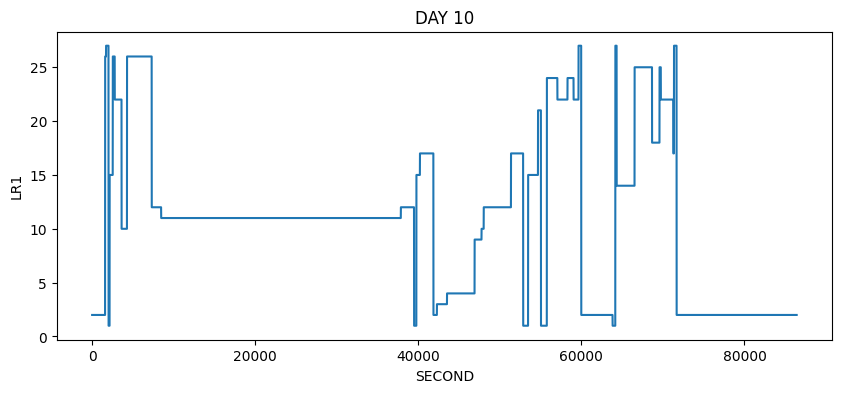

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=20737;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=949206;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

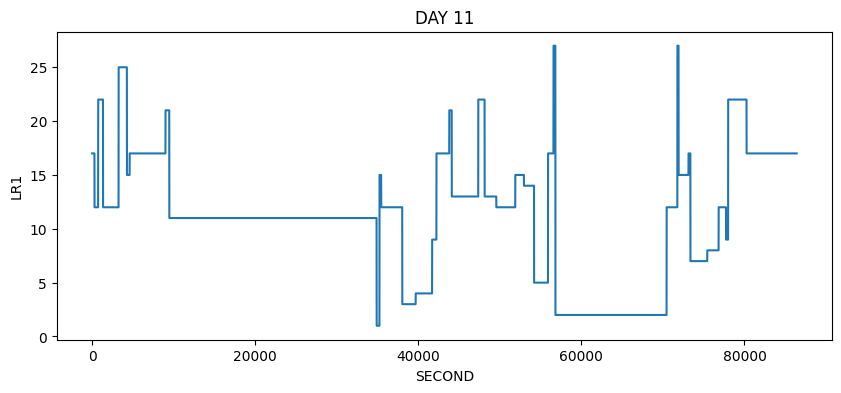

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=542285;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=829148;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

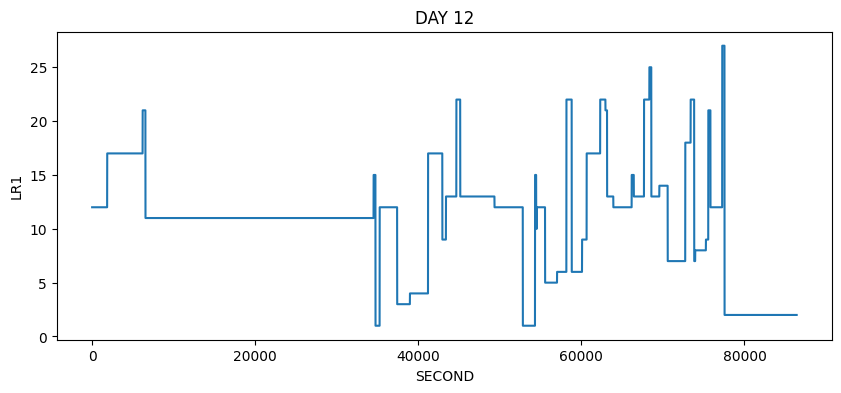

[01/30/24 13:42:31] WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=784369;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=656406;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

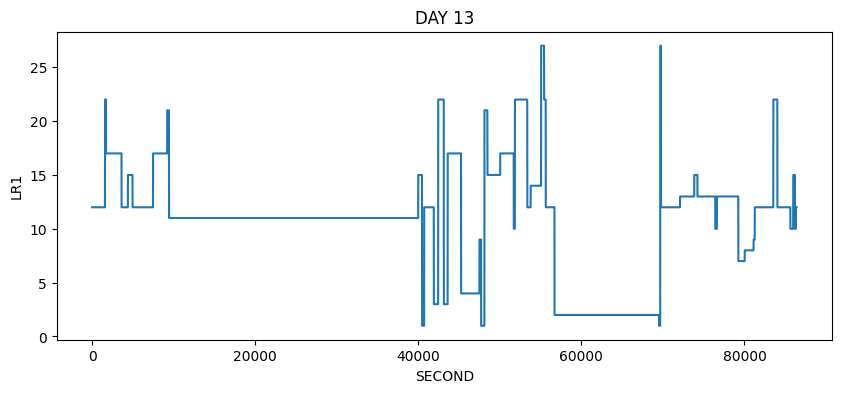

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=569481;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=247548;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

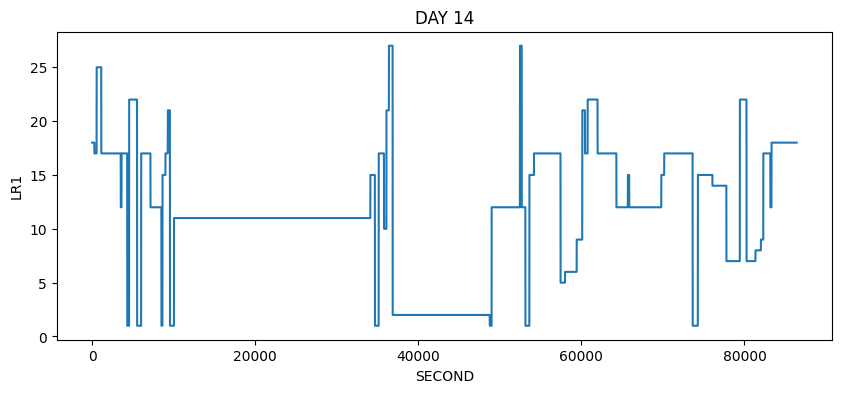

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=222338;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=152615;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

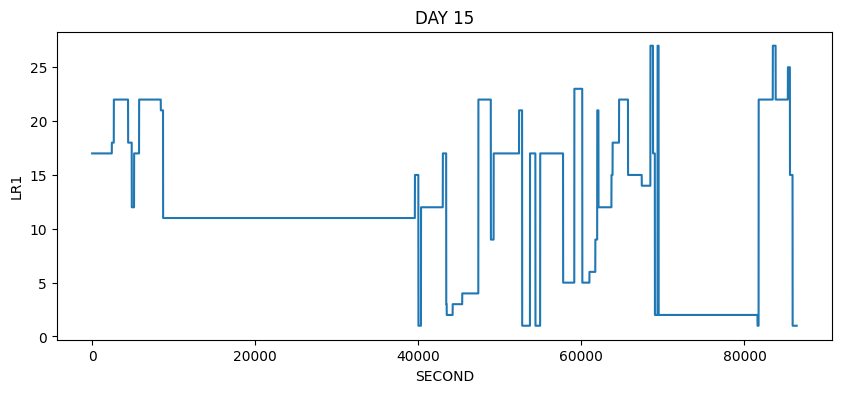

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=533753;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=72647;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

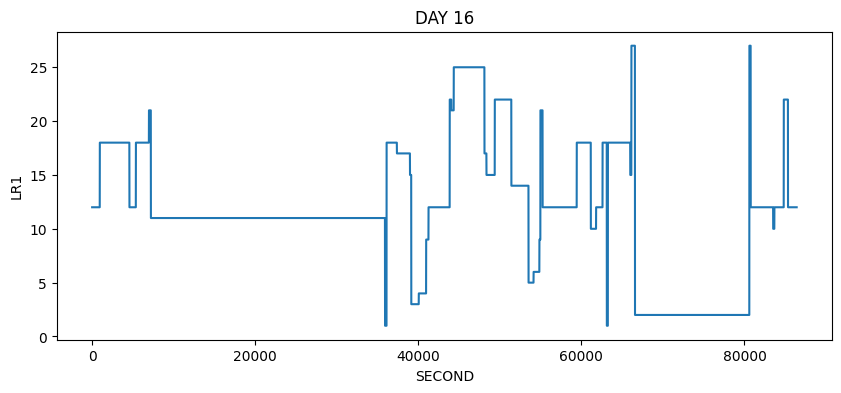

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=196628;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=730060;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

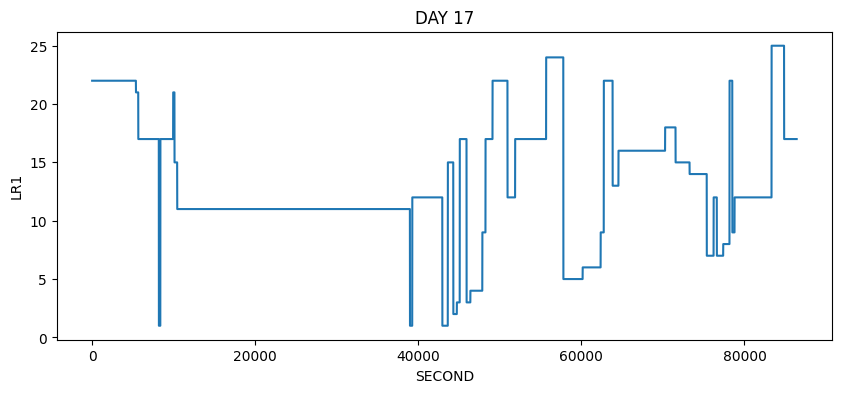

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=374729;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=730395;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

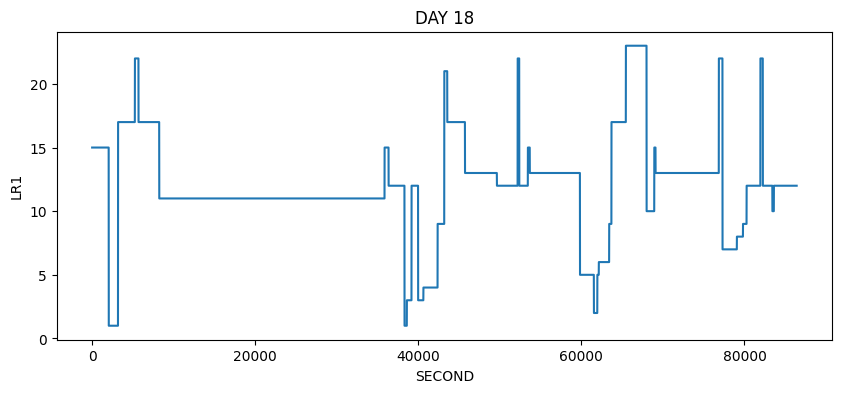

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=399705;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=891563;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

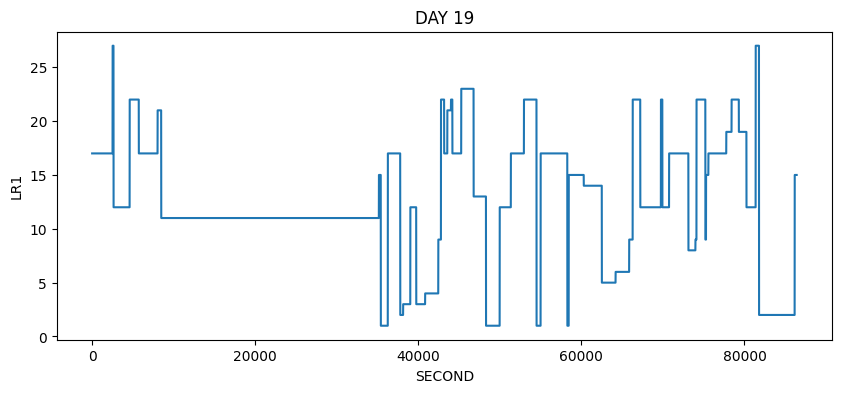

[01/30/24 13:42:32] WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=639702;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=533496;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

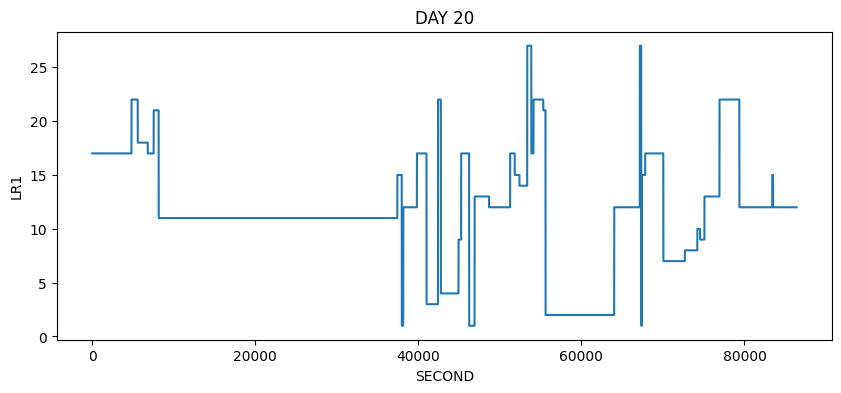

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=987013;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=964408;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

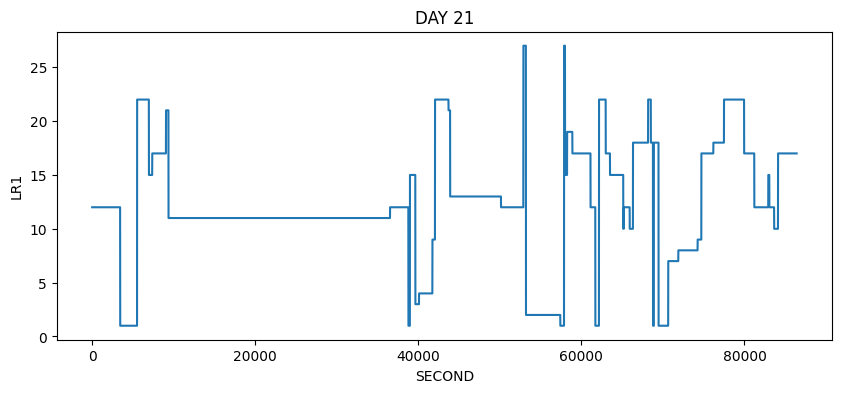

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=805819;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=284204;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

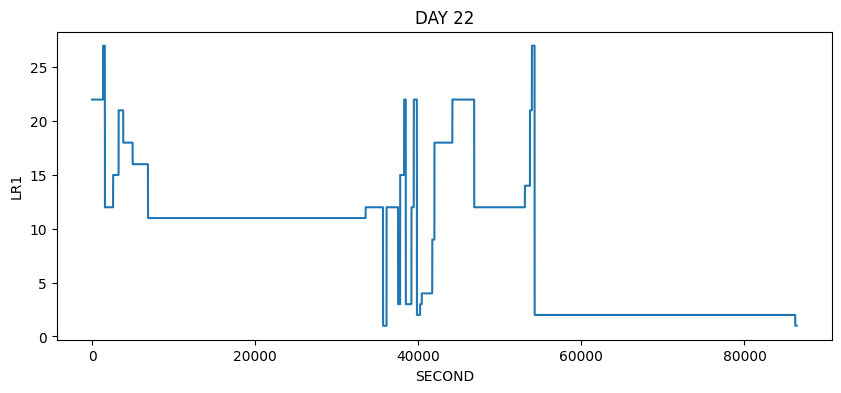

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=433269;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=4849;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

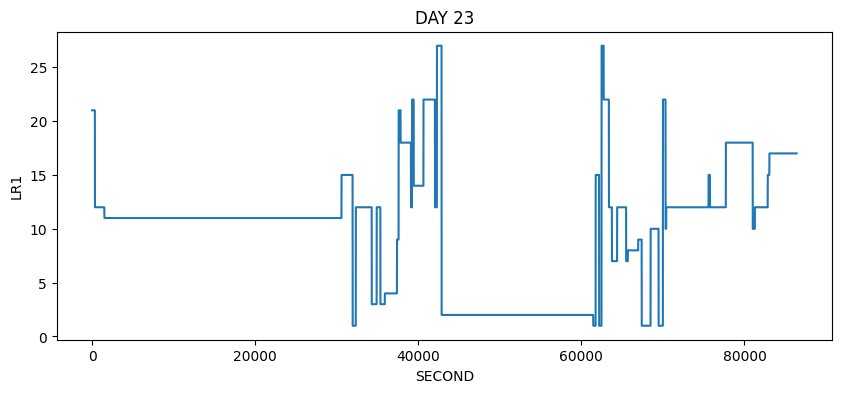

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=570397;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=5443;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

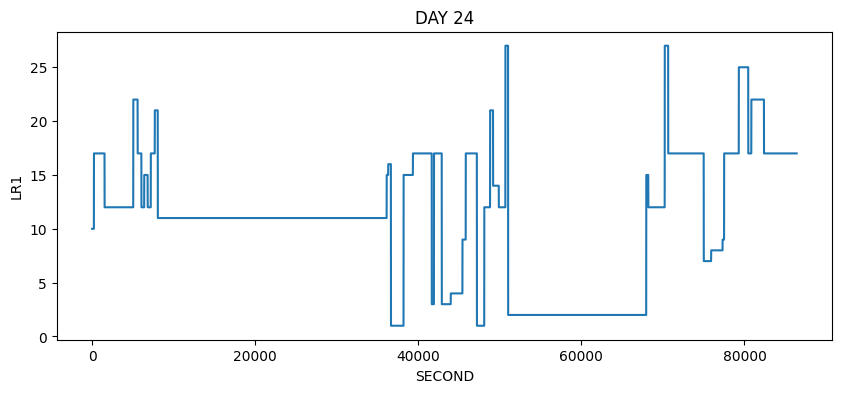

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=635458;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=529124;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

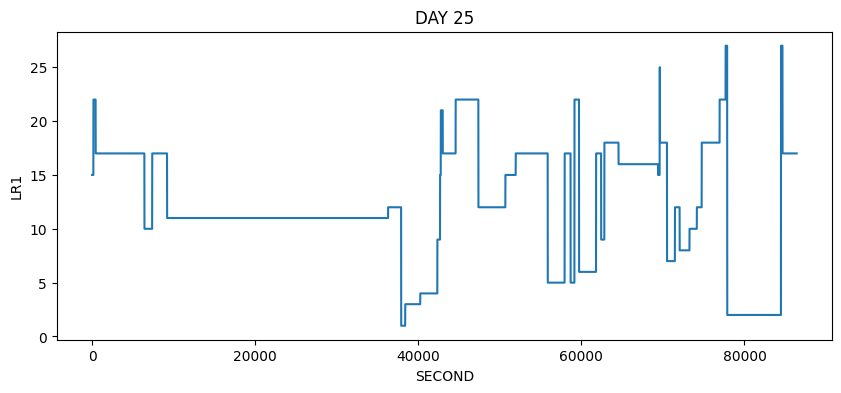

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=964743;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=137733;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

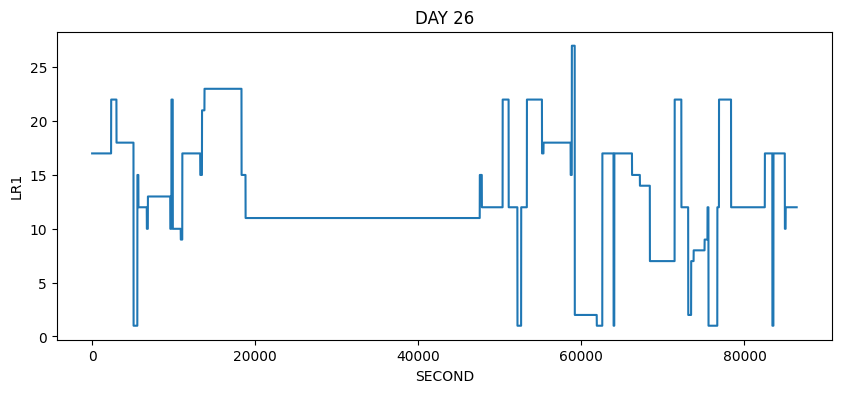

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=292588;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=46915;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

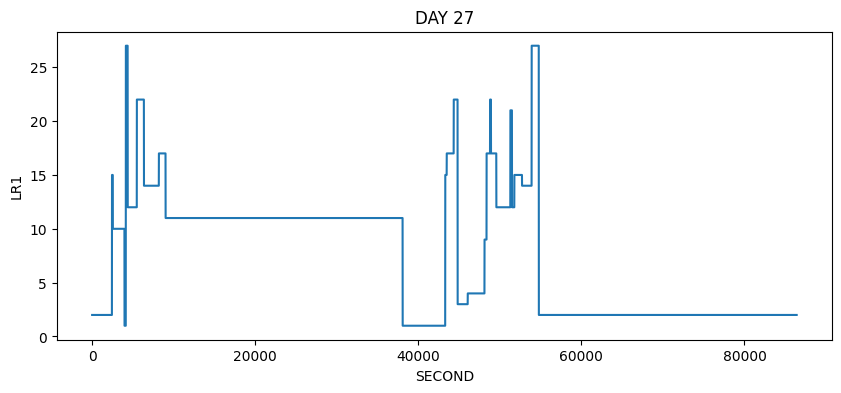

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=486668;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=800299;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

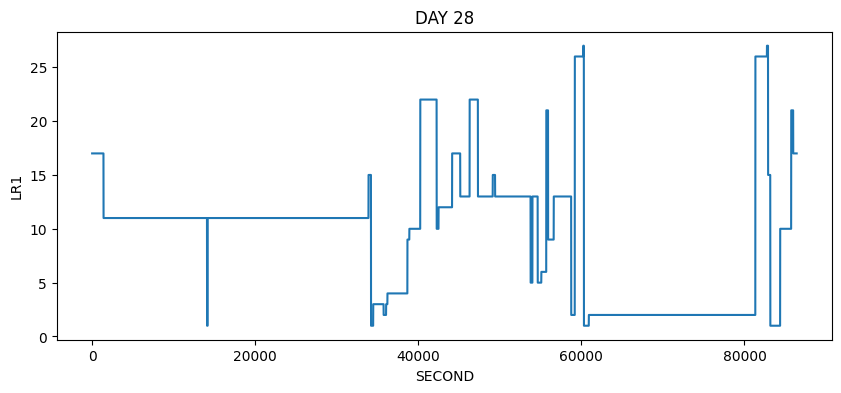

[01/30/24 13:42:33] WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=369933;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=584886;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

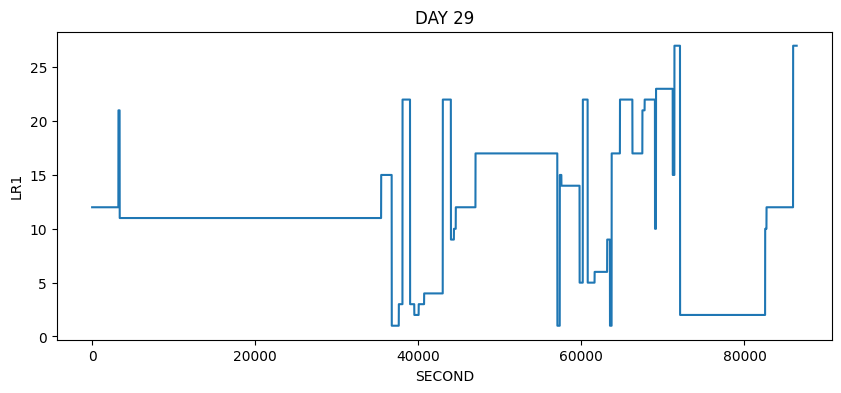

                    WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=789961;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=649952;file:///home/sossa/miniconda3/envs/raftel/lib/python3.8/site-packages/matplotlib/legend.py#1323\1323]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

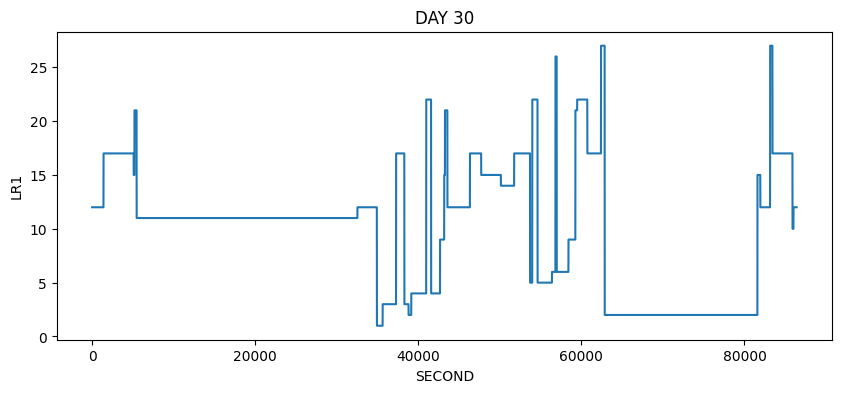

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

x = df.loc[df['DAY'] == 1, 'SEC']

for i in range(1, 31):
    y = df.loc[df['DAY'] == i, 'LR1']
    
    plt.figure(figsize=(10,4))
    plt.plot(x, y)
    plt.ylabel('LR1')
    plt.xlabel('SECOND')
    plt.title(f"DAY {i}")
    plt.legend().remove()
    plt.show()